# Шаблонный метод
Шаблонный метод — это поведенческий паттерн проектирования, который определяет скелет
алгоритма, перекладывая ответственность за некоторые его шаги на подклассы. 

Паттерн
позволяет подклассам переопределять шаги алгоритма, не меняя его общей структуры.
Паттерн Шаблонный метод предлагает разбить алгоритм на последовательность шагов, описать
эти шаги в отдельных методах и вызывать их в одном шаблонном методе друг за другом.

Это позволит подклассам переопределять некоторые шаги алгоритма, оставляя без изменений его
структуру и остальные шаги, которые для этого подкласса не так важны.

Примером использования шаблонного метода может стать система генерации отчётов:

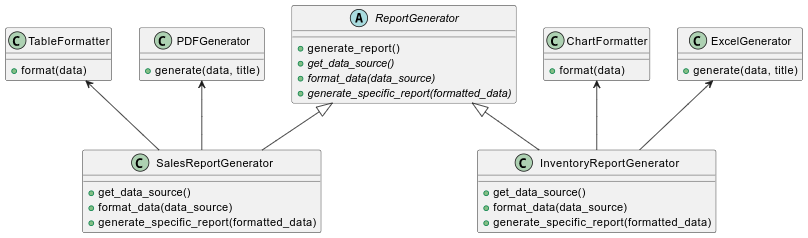

Есть базовый абстрактный класс ReportGenerator, предоставляющий шаблон для создания отчётов и классы SalesReportGenerator (отчёт о продажах) и InventoryReportGenerator (расходная накладная), использующие свои форматы и генераторы файлов.

# Реализация на языке программирования Python

Реализуем абстрактный метод:

In [9]:
from abc import ABC, abstractmethod

class ReportGenerator(ABC):
    
    @abstractmethod
    def generate_report(self):
        pass
    
    @abstractmethod
    def get_data_source(self):
        pass
    
    @abstractmethod
    def format_data(self, data_source):
        pass
    
    @abstractmethod
    def generate_specific_report(self, formatted_data):
        pass

Реализуем генератор отчётов о продажах:

In [10]:
class ChartFormatter:
    
    def format(self, data):
        print("Генерирую схему")


class PDFGenerator:
    
    def generate(self, data, title):
        print("Сохраняю в формате PDF")

class SalesReportGenerator(ReportGenerator):
    
    def generate_report(self):
        data_source = self.get_data_source()
        formatted_data = self.format_data(data_source)
        self.generate_specific_report(formatted_data)
        
    def get_data_source(self):
        print("Получаю информацию о продажах")
    
    def format_data(self, data_source):
        print("Форматирую информацию")
    
    def generate_specific_report(self, formatted_data):
        print("Генерирую отчёт ")

Реализуем генератор расходной накладной:

In [11]:
class TableFormatter:
    
    def format(self, data):
        print("Форматирую таблицу")

class ExcelGenerator:
    def generate(self, data, title):
        print("Сохраняю таблицу Excel")

class InventoryReportGenerator(ReportGenerator):
    
    def generate_report(self):
        data_source = self.get_data_source()
        formatted_data = self.format_data(data_source)
        self.generate_specific_report(formatted_data)
        
    def get_data_source(self):
        print("Получаю информацию со склада")
    
    def format_data(self, data_source):
        print("Форматирую информацию со склада")
    
    def generate_specific_report(self, formatted_data):
        print("Генерирую отчёт")

Запустим примеры:

In [12]:
sales_report = SalesReportGenerator()
inventory_report = InventoryReportGenerator()

table_formatter = TableFormatter()
chart_formatter = ChartFormatter()

pdf_generator = PDFGenerator()
excel_generator = ExcelGenerator()

sales_report.table_formatter = table_formatter
sales_report.pdf_generator = pdf_generator

inventory_report.chart_formatter = chart_formatter
inventory_report.excel_generator = excel_generator

sales_report.generate_report()
print()
inventory_report.generate_report()

Получаю информацию о продажах
Форматирую информацию
Генерирую отчёт 

Получаю информацию со склада
Форматирую информацию со склада
Генерирую отчёт
